<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_8_Advanced_Dimensionality_Reduction_and_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# BILAL-Assignment 8: Advanced Dimensionality Reduction and Component Analysis.ipynb
# Uploading Files
from google.colab import files

uploaded = files.upload()

Saving olivettifaces.zip to olivettifaces.zip


In [3]:
# Unzipping the uploaded Dataset
!unzip KDDTest+.zip

unzip:  cannot find or open KDDTest+.zip, KDDTest+.zip.zip or KDDTest+.zip.ZIP.


In [4]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import (
    load_wine,
    load_breast_cancer,
    load_digits,
    fetch_olivetti_faces
)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FastICA

In [5]:
# General Visualization Function
def plot_2d(X, y, title):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=20)
    plt.colorbar(scatter)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.show()

In [6]:
# PCA on Wine Dataset
# Loading and Standardizing the Wine Dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

In [8]:
# Applying PCA
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.36198848 0.1920749 ]


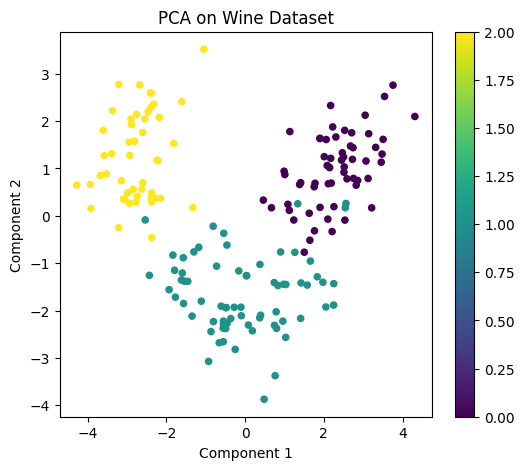

In [9]:
# Visualizing PCA Result
plot_2d(X_wine_pca, y_wine, "PCA on Wine Dataset")

In [10]:
# Kernel PCA on Breast Cancer Dataset
# Loading and Scaling Dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

X_cancer_scaled = StandardScaler().fit_transform(X_cancer)

In [11]:
# Applying Kernel PCA - RBF Kernel
kpca = KernelPCA(
    n_components=2,
    kernel='rbf',
    gamma=0.05
)

X_cancer_kpca = kpca.fit_transform(X_cancer_scaled)

In [ ]:
# Applying Kernel PCA -RBF Kernel
kpca = KernelPCA(
    n_components=2,
    kernel='rbf',
    gamma=0.05
)

X_cancer_kpca = kpca.fit_transform(X_cancer_scaled)

In [ ]:
# Visualizing Kernel PCA
plot_2d(X_cancer_kpca, y_cancer, "Kernel PCA (RBF) on Breast Cancer Dataset")

In [13]:
# Sparsing PCA on Digits Dataset
# Loading Digits Dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

In [14]:
# Applying Sparse PCA
spca = SparsePCA(
    n_components=2,
    alpha=0.1,
    random_state=42
)

X_digits_spca = spca.fit_transform(X_digits)

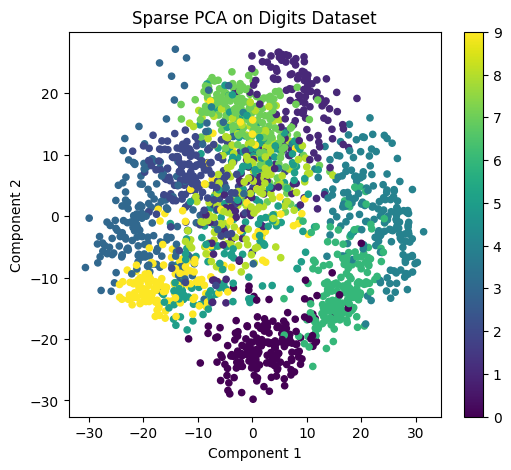

In [15]:
# Visualizing Sparse PCA
plot_2d(X_digits_spca, y_digits, "Sparse PCA on Digits Dataset")

In [17]:
# ICA on Olivetti Faces Dataset
# Loading Olivetti Faces Dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X_faces = faces.data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [18]:
# Applying ICA
ica = FastICA(
    n_components=16,
    random_state=42,
    max_iter=1000
)

X_faces_ica = ica.fit_transform(X_faces)
components = ica.components_

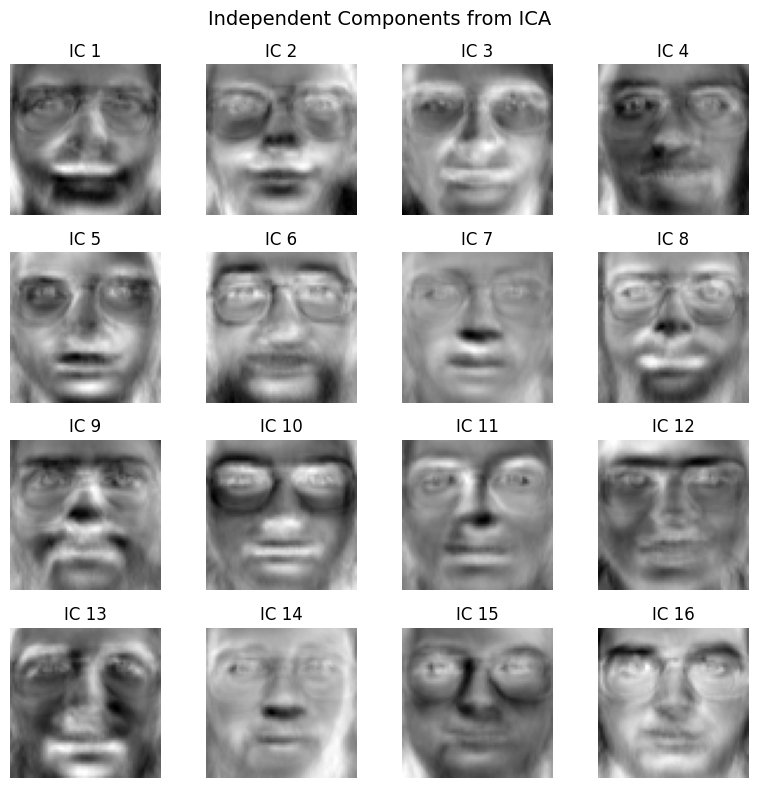

In [19]:
# Visualizing Independent Components
plt.figure(figsize=(8, 8))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(components[i].reshape(64, 64), cmap='gray')
    plt.axis('off')
    plt.title(f"IC {i+1}")

plt.suptitle("Independent Components from ICA", fontsize=14)
plt.tight_layout()
plt.show()

1. PCA on Wine Dataset
•	PCA reduced the original 13 features into 2 principal components.
•	The first two components captured most of the variance.
•	Clear separation between wine classes was observed.

2. Kernel PCA on Breast Cancer Dataset
•	Kernel PCA with RBF kernel captured non-linear patterns.
•	Improved class separation compared to linear PCA.
•	Useful for datasets with complex decision boundaries.

3. Sparse PCA on Digits Dataset
•	Sparse PCA produced components using fewer features.
•	Resulting representation remained interpretable.
•	Digits were reasonably separated in low-dimensional space.

4. ICA on Olivetti Faces Dataset
•	ICA extracted statistically independent facial features.
•	Components resemble localized facial structures.
•	Effective for signal separation and feature extraction.
